## TGM

In [ ]:
adj_train_tgm_glove = load_data('/content/drive/MyDrive/Results/a0003/tgm_true/adj_train/glove/tgm_A0003_classify_adj_train_on_channels_with_random_averaging.mat')
adj_train_tgm_gpt = load_data('/content/drive/MyDrive/Results/a0003/tgm_true/adj_train/gpt2/tgm_a0003_adj_train_on_gpt2.mat')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io
def load_data(file_path):
  """
  This function will return the content of matlab file in the directory
  """
  result = scipy.io.loadmat(file_path)
  return result

In [ ]:
def results_dictionary():#a0003_skipgram_noun_train.mat
  subjects = ['avg4subjects']
  # tgms = ['tgm_true']
  #subjects = ['a0003']
  conditions = ['adj_train']
  # wvecs = ['gpt2', 'glove']
  wvecs = ['skipgram', 'gpt2', 'glove']
  #conditions = ['straight']
  tgms = ['tgm_false']
  root_path = '/content/drive/MyDrive/Results/'
  results_dic = {}
  for subject in subjects:
    for tgm in tgms:
      for condition in conditions:
        for wvec in wvecs:
          try:
            temp_path = root_path + f'{subject}/{tgm}/{condition}/{wvec}/{subject}_{wvec}_{condition}.mat'
            print(temp_path)
            results_dic [subject, tgm, condition, wvec ] = load_data(temp_path)
          except:
            pass
  return results_dic

In [ ]:
results_dic = results_dictionary()


/content/drive/MyDrive/Results/avg4subjects/tgm_false/adj_train/skipgram/avg4subjects_skipgram_adj_train.mat
/content/drive/MyDrive/Results/avg4subjects/tgm_false/adj_train/gpt2/avg4subjects_gpt2_adj_train.mat
/content/drive/MyDrive/Results/avg4subjects/tgm_false/adj_train/glove/avg4subjects_glove_adj_train.mat


In [ ]:
results_dic.keys()

dict_keys([('avg4subjects', 'tgm_false', 'adj_adj', 'skipgram'), ('avg4subjects', 'tgm_false', 'adj_adj', 'gpt2'), ('avg4subjects', 'tgm_false', 'adj_adj', 'glove')])

In [ ]:
results_dic[('a0005', 'tgm_false', 'adj_train', 'gpt2')]['all_2v2'].shape

(36, 5, 2)

In [ ]:
results_dic.keys()

dict_keys([('a0003', 'tgm_true', 'adj_train', 'gpt2'), ('a0003', 'tgm_true', 'adj_train', 'glove')])

In [ ]:
results_dic[('a0003', 'tgm_false', 'adj_adj', 'skipgram')].keys()

dict_keys(['__header__', '__version__', '__globals__', 'all_2v2', 'subjs', 't_vec', 'params', 'parser', 'all_2v2_res'])

In [ ]:
#results_dic[('a0003', 'tgm_false', 'straight', 'skipgram')]['all_2v2'][:,:,0,0][:,2]
results_dic[('a0003', 'tgm_false', 'straight', 'skipgram')]['all_2v2'][:,:,1, 1][:,1]

array([54.375, 55.   , 66.875, 60.625, 56.875, 53.125, 56.875, 61.875,
       69.375, 73.75 , 70.   , 77.5  , 68.125, 70.625, 73.75 , 65.   ,
       60.   , 60.625, 48.75 , 51.875, 49.375, 60.625, 66.875, 72.5  ,
       71.875, 74.375, 68.75 , 62.5  , 52.5  , 48.125, 51.25 , 61.25 ,
       65.625, 57.5  , 55.   , 61.875])

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

def ready_for_df(results_dic):

  conditions = ['straight', 'adj_train', 'noun_train', 'adj_adj']
  wvecs = ['skipgram', 'gpt2', 'glove']
  time = []
  # Wvec = [] 
  subject = []
  condition = []
  tgm = []
  condition_result_dic = defaultdict(lambda: defaultdict(lambda:0))
  for wvec in wvecs:
    accuracy_adj_straight_phrase = []
    accuracy_adj_straight_list = []
    accuracy_noun_straight_phrase = []
    accuracy_noun_straight_list = []
    accuracy_adj_adj_train_phrase = []
    accuracy_adj_adj_train_list = []
    accuracy_noun_noun_train_phrase = []
    accuracy_noun_noun_train_list = []
    accuracy_adj_adj_train_adj_test_adj = []
    for key, value in results_dic.items():
      if key[3] == wvec:
        if key[2]== 'straight':
          accuracy_adj_straight_phrase.append(results_dic[key]['all_2v2'][:,:,0, 1][:,1])
          time = results_dic[key]['t_vec'][0]
          accuracy_adj_straight_list.append(results_dic[key]['all_2v2'][:,:,0, 1][:, 2])
          accuracy_noun_straight_phrase.append(results_dic[key]['all_2v2'][:,:,1, 1][:,1])
          accuracy_noun_straight_list.append(results_dic[key]['all_2v2'][:,:,1, 1][:,2])
          #counter = len(results_dic[key]['all_2v2'][:,:,0, 1][:,1])
        elif key[2]== 'adj_train':
          accuracy_adj_adj_train_phrase.append(results_dic[key]['all_2v2'][:,:,0][:, 1])
          accuracy_adj_adj_train_list.append(results_dic[key]['all_2v2'][:,:,0][:, 2])
          #counter = len(results_dic[key]['all_2v2'][:,:,0][:, 2])
        elif key[2]== 'noun_train':
          accuracy_noun_noun_train_phrase.append(results_dic[key]['all_2v2'][:,:,1][:, 1])
          accuracy_noun_noun_train_list.append(results_dic[key]['all_2v2'][:,:,1][:, 2])
          #counter = len(results_dic[key]['all_2v2'][:,:,1][:, 2])
        elif key[2]=='adj_adj':
          accuracy_adj_adj_train_adj_test_adj.append(results_dic[key]['all_2v2'][:,:,0,0][:, 3])
    condition_result_dic[wvec]['straight', 'adj', 'phrase']= accuracy_adj_straight_phrase
    condition_result_dic[wvec]['time']= time
    condition_result_dic[wvec]['straight', 'adj', 'list']= accuracy_adj_straight_list
    condition_result_dic[wvec]['straight', 'noun', 'phrase']= accuracy_noun_straight_phrase
    condition_result_dic[wvec]['straight', 'noun', 'list']= accuracy_noun_straight_list
    condition_result_dic[wvec]['adj_train', 'adj', 'phrase'] = accuracy_adj_adj_train_phrase
    condition_result_dic[wvec]['adj_train', 'adj', 'list']= accuracy_adj_adj_train_list
    condition_result_dic[wvec]['noun_train', 'noun', 'phrase']= accuracy_noun_noun_train_phrase
    condition_result_dic[wvec]['noun_train', 'noun', 'list']= accuracy_noun_noun_train_list
    condition_result_dic[wvec]['adj_adj', 'adj', 'adj']= accuracy_adj_adj_train_adj_test_adj
       
  return condition_result_dic

  




In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

def ready_for_df_modified(results_dic):

  conditions = ['straight', 'adj_train', 'noun_train', 'adj_adj']
  wvecs = ['skipgram', 'gpt2', 'glove']
  subjects = ['avg4subjects']
  # time = []
  # # Wvec = [] 
  # subject = []
  # condition = []
  # tgm = []
  #condition_result_dic = defaultdict(lambda: defaultdict(lambda:0))
  condition_result_dic = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda:0)))
  for subject in subjects:
    for wvec in wvecs:
      accuracy_adj_straight_phrase = []
      accuracy_adj_straight_list = []
      accuracy_noun_straight_phrase = []
      accuracy_noun_straight_list = []
      accuracy_adj_adj_train_phrase = []
      accuracy_adj_adj_train_list = []
      accuracy_noun_noun_train_phrase = []
      accuracy_noun_noun_train_list = []
      accuracy_adj_adj_train_adj_test_adj = []
      for key, value in results_dic.items():
        if key[0]==subject:
          if key[3] == wvec:
            if key[2]== 'straight':
              accuracy_adj_straight_phrase.append(results_dic[key]['all_2v2'][:,:,0, 1][:,1])
              time = results_dic[key]['t_vec'][0]
              accuracy_adj_straight_list.append(results_dic[key]['all_2v2'][:,:,0, 1][:, 2])
              accuracy_noun_straight_phrase.append(results_dic[key]['all_2v2'][:,:,1, 1][:,1])
              accuracy_noun_straight_list.append(results_dic[key]['all_2v2'][:,:,1, 1][:,2])
              #counter = len(results_dic[key]['all_2v2'][:,:,0, 1][:,1])
            elif key[2]== 'adj_train':
              accuracy_adj_adj_train_phrase.append(results_dic[key]['all_2v2'][:,:,0][:, 1])
              accuracy_adj_adj_train_list.append(results_dic[key]['all_2v2'][:,:,0][:, 2])
              time = results_dic[key]['t_vec'][0]
              #counter = len(results_dic[key]['all_2v2'][:,:,0][:, 2])
            elif key[2]== 'noun_train':
              accuracy_noun_noun_train_phrase.append(results_dic[key]['all_2v2'][:,:,1][:, 1])
              accuracy_noun_noun_train_list.append(results_dic[key]['all_2v2'][:,:,1][:, 2])
              #counter = len(results_dic[key]['all_2v2'][:,:,1][:, 2])
            elif key[2]=='adj_adj':
              accuracy_adj_adj_train_adj_test_adj.append(results_dic[key]['all_2v2'][:,:,0,0][:, 3])
              time = results_dic[key]['t_vec'][0]
      condition_result_dic[subject][wvec]['straight', 'adj', 'phrase'] = accuracy_adj_straight_phrase
      condition_result_dic[subject][wvec]['time']= time
      condition_result_dic[subject][wvec]['straight', 'adj', 'list']= accuracy_adj_straight_list
      condition_result_dic[subject][wvec]['straight', 'noun', 'phrase']= accuracy_noun_straight_phrase
      condition_result_dic[subject][wvec]['straight', 'noun', 'list']= accuracy_noun_straight_list
      condition_result_dic[subject][wvec]['adj_train', 'adj', 'phrase'] = accuracy_adj_adj_train_phrase
      condition_result_dic[subject][wvec]['adj_train', 'adj', 'list']= accuracy_adj_adj_train_list
      condition_result_dic[subject][wvec]['noun_train', 'noun', 'phrase']= accuracy_noun_noun_train_phrase
      condition_result_dic[subject][wvec]['noun_train', 'noun', 'list']= accuracy_noun_noun_train_list
      condition_result_dic[subject][wvec]['adj_adj', 'adj', 'adj']= accuracy_adj_adj_train_adj_test_adj
       
  return condition_result_dic

  




In [ ]:
condition_result_dic_modified = ready_for_df_modified(results_dic)


In [ ]:
condition_result_dic_modified['a0003']['skipgram'][('straight', 'adj', 'list')][0]

array([40.625, 43.75 , 48.75 , 42.5  , 51.25 , 48.75 , 53.75 , 51.875,
       55.625, 46.25 , 43.125, 40.625, 35.625, 33.125, 36.875, 36.875,
       33.75 , 41.25 , 38.75 , 37.5  , 47.5  , 61.25 , 60.   , 61.875,
       64.375, 68.75 , 67.5  , 73.75 , 62.5  , 58.125, 58.75 , 61.25 ,
       56.875, 59.375, 51.25 , 45.625])

In [ ]:
#statistical significance test
from scipy import stats
print('statistical significance test between 2vs2 accuracy of adjective')
print('when it is train on list and test on phrase and')
print('when it is tested on list and tested on phrase')
print(stats.ttest_ind(condition_result_dic_modified['a0003']['skipgram'][('straight', 'adj', 'list')][0],condition_result_dic_modified['a0003']['skipgram'][('straight', 'adj', 'phrase')][0]))

statistical significance test between 2vs2 accuracy of adjective
when it is train on list and test on phrase and
when it is tested on list and tested on phrase
Ttest_indResult(statistic=1.7047912328388457, pvalue=0.09266818028258822)


In [ ]:
#statistical significance test
from scipy import stats
print('statistical significance test between 2vs2 accuracy of noun')
print('when it is train on list and test on phrase and')
print('when it is tested on list and tested on phrase')
print(stats.ttest_ind(condition_result_dic_modified['a0003']['skipgram'][('straight', 'noun', 'list')][0],condition_result_dic_modified['a0003']['skipgram'][('straight', 'noun', 'phrase')][0]))

statistical significance test between 2vs2 accuracy of noun
when it is train on list and test on phrase and
when it is tested on list and tested on phrase
Ttest_indResult(statistic=-2.858100239699667, pvalue=0.005609244415514004)


In [ ]:
condition_result_dic_modified['avg4subjects']['skipgram'][('straight', 'noun', 'list')]

[array([68.125, 64.375, 62.5  , 48.75 , 53.125, 51.25 , 60.   , 56.875,
        51.25 , 46.25 , 49.375, 44.375, 51.25 , 61.25 , 62.5  , 69.375,
        53.75 , 42.5  , 38.75 , 36.25 , 40.   , 36.25 , 34.375, 40.   ,
        48.75 , 48.125, 61.25 , 63.125, 62.5  , 56.25 , 56.25 , 60.   ,
        54.375, 46.875, 41.875, 40.   ])]

In [ ]:
condition_result_dic_modified['avg'].keys()

dict_keys(['skipgram', 'gpt2', 'glove'])

In [ ]:
condition_result_dic['skipgram'].keys()

NameError: ignored

In [ ]:
# condition_result_dic['gpt2'][('straight', 'adj', 'phrase')][0]
# condition_result_dic['gpt2'][('straight', 'noun', 'phrase')][0]

# condition_result_dic['gpt2'][('straight', 'adj', 'list')][0]
# condition_result_dic['gpt2'][('straight', 'noun', 'list')][0]

condition_result_dic['gpt2'][('adj_train', 'adj', 'phrase')][0]
condition_result_dic['gpt2'][('adj_train', 'adj', 'list')][0]

# condition_result_dic['gpt2'][('noun_train', 'noun', 'phrase')][0]
# condition_result_dic['gpt2'][('noun_train', 'noun', 'list')][0]

# condition_result_dic['gpt2'][(('adj_adj', 'adj', 'adj'))][0]



NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_results(condition_result_dic, subject, wvec, condition, pl):
  plt.xticks(fontsize=14)
  fig = plt.gcf()
  # import seaborn as sns:
  # wvecs =['skipgram']
  if len(wvec) == 1:
    fig.set_size_inches(8, 6)
    label1 = wvec[0] + '-adj'
    label2 = wvec[0] + '-noun'
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition, 'adj', pl)][0], label=label1, color = 'b', linewidth=2)
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition, 'noun', pl)][0], label=label2, color='r', linewidth=2)
  elif len(wvec) == 3:
    fig.set_size_inches(14, 8)
    label1 = wvec[0] + '-adj'
    label2 = wvec[0] + '-noun'
    
    label3 = wvec[1] + '-adj'
    label4 = wvec[1] + '-noun'
    
    label5 = wvec[2] + '-adj'
    label6 = wvec[2] + '-noun'
    
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition, 'adj', pl)][0], label=label1, color = 'b', linewidth=2)
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition, 'noun', pl)][0], label=label2, color='r', linewidth=2)
    
    plt.plot(condition_result_dic[subject][wvec[1]]['time'], condition_result_dic[subject][wvec[1]][(condition, 'adj', pl)][0], label=label3, color='b', linestyle='dotted', linewidth=2)
    plt.plot(condition_result_dic[subject][wvec[1]]['time'], condition_result_dic[subject][wvec[1]][(condition, 'noun', pl)][0], label=label4, color='r', linestyle='dotted', linewidth=2)
    
    plt.plot(condition_result_dic[subject][wvec[2]]['time'], condition_result_dic[subject][wvec[2]][(condition, 'adj', pl)][0], label=label5, color='b', linestyle='dashed', linewidth=2)
    plt.plot(condition_result_dic[subject][wvec[2]]['time'], condition_result_dic[subject][wvec[2]][(condition, 'noun', pl)][0], label=label6, color='r', linestyle='dashed', linewidth=2)
  
    
  #plt.yticks(plt.get_yticks(), size = 15)
  #plt.xticks(plt.get_yticks(), size = 15)
  plt.xlabel("Time",fontsize=16)
  plt.ylabel("2 Vs 2 accuracy (%)",fontsize=16)
  plt.xticks(fontsize=16, color='black')
  plt.yticks(fontsize=16, color='black')
  #plt.legend(['First Subject', 'Average Across All'],fontsize='x-large', title_fontsize='40')
  if pl == 'phrase':
    tmp = 'phrase'
  elif pl == 'list':
    tmp = 'list'

  plt.title('Train on phrase test on ' + tmp, fontsize=16)
  plt.legend(title='Subject=avg[3,5,7,8]', loc=4, fontsize=12, frameon=False)
  #plt.savefig('/content/drive/MyDrive/Results/img/avg[3,5,7,8]_skipgram_gpt2_glove_straight_train_phrase_test_' + tmp + '.png', dpi=300)
  

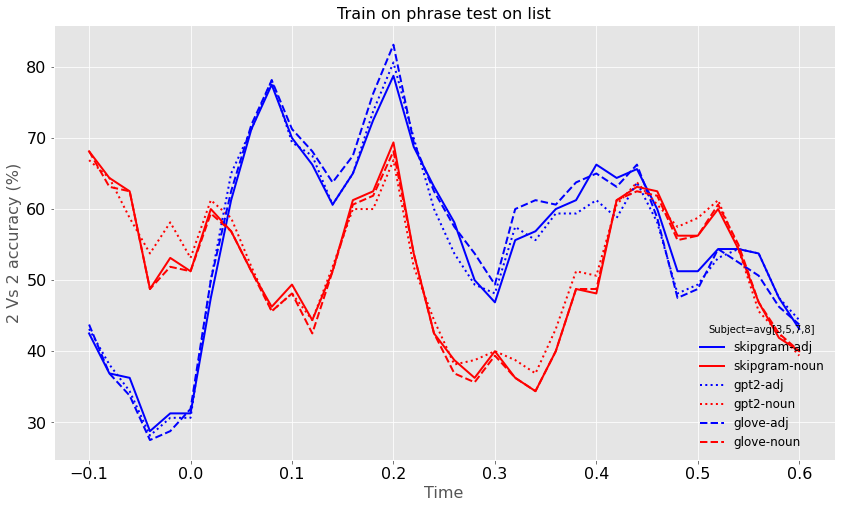

In [ ]:
plot_results(condition_result_dic_modified, 'avg4subjects', ['skipgram', 'gpt2', 'glove'], 'straight', 'list')

In [ ]:
# adj_train
# noun_train


import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_results_adj_train(condition_result_dic, subject,  wvec, condition, pl):
  plt.xticks(fontsize=14)
  fig = plt.gcf()
  # import seaborn as sns:
  # wvecs =['skipgram']
  if len(wvec) == 1:
    fig.set_size_inches(8, 6)
    label1 = wvec[0] + '-adj' + '-list'
    label2 = wvec[0] + '-adj' + '-phrase'
    label3 = wvec[0] + '-noun' + '-list'
    label4 = wvec[0] + '-noun' + '-phrase'
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[0], 'adj', 'list')][0], label=label1, color = 'b', linestyle='solid', linewidth=2, marker='o')
    # plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[0], 'adj', 'phrase')][0], label=label2, color = 'b', linestyle='--', linewidth=2)
    #plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[1], 'noun', 'list')][0], label=label3, color = 'r', linestyle='solid', linewidth=2)
    # plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[1], 'noun', 'phrase')][0], label=label4, color='r', linestyle='--', linewidth=2)
  elif len(wvec) == 3:
    fig.set_size_inches(14, 8)
    label1 = wvec[0] + '-adj'
    label2 = wvec[0] + '-noun'
    
    label3 = wvec[1] + '-adj'
    label4 = wvec[1] + '-noun'
    
    label5 = wvec[2] + '-adj'
    label6 = wvec[2] + '-noun'
    
    plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[0], 'adj', pl)][0], label=label1, color = 'b', linewidth=2)
    # plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[1], 'noun', pl)][0], label=label2, color='r', linewidth=2)
    
    plt.plot(condition_result_dic[subject][wvec[1]]['time'], condition_result_dic[subject][wvec[1]][(condition[0], 'adj', pl)][0], label=label3, color='b', linestyle='dotted', linewidth=2)
    # plt.plot(condition_result_dic[subject][wvec[1]]['time'], condition_result_dic[subject][wvec[1]][(condition[1], 'noun', pl)][0], label=label4, color='r', linestyle='dotted', linewidth=2)
    
    plt.plot(condition_result_dic[subject][wvec[2]]['time'], condition_result_dic[subject][wvec[2]][(condition[0], 'adj', pl)][0], label=label5, color='b', linestyle='dashed', linewidth=2)
    # plt.plot(condition_result_dic[subject][wvec[2]]['time'], condition_result_dic[subject][wvec[2]][(condition[1], 'noun', pl)][0], label=label6, color='r', linestyle='dashed', linewidth=2)
  
    
  #plt.yticks(plt.get_yticks(), size = 15)
  #plt.xticks(plt.get_yticks(), size = 15)
  plt.title('Train on adjective, test on ' + pl, fontsize=18)
  plt.xlabel("Time",fontsize=20)
  plt.ylabel("2 Vs 2 accuracy (%)",fontsize=20)
  plt.xticks(fontsize=20, color='black')
  plt.yticks(fontsize=20, color='black')
  #plt.legend(['First Subject', 'Average Across All'],fontsize='x-large', title_fontsize='40')
  # if pl == 'phrase':
  #   tmp = 'phrase'
  # elif pl == 'list':
  #   tmp = 'list'

  # plt.title('Nouns and adjectives decodability, when presented within ' + tmp, fontsize=15)
  plt.legend(title='Subject=avg[3,5,7,8]ects', loc=4, fontsize=10, frameon=False)
  #plt.savefig("/content/drive/MyDrive/Results/img/avg[3,5,7,8]_skipgram_glove_gpt2_adj_phrase", dpi=300)

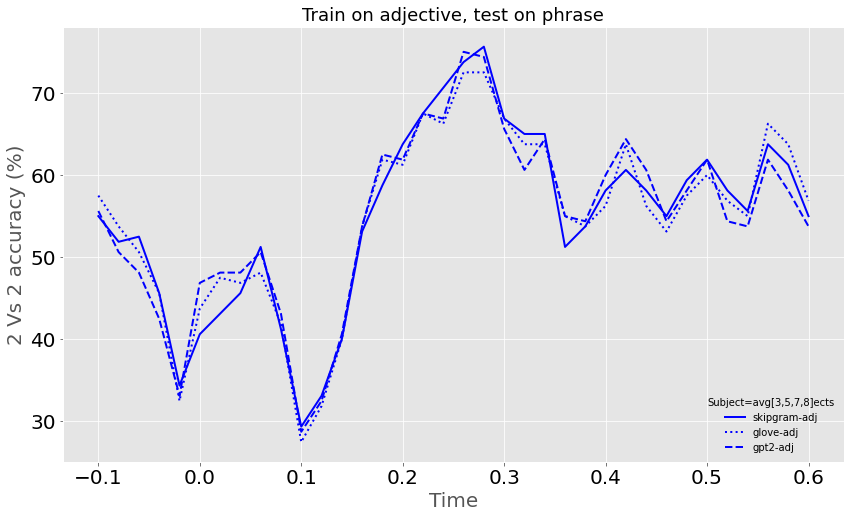

In [ ]:
plot_results_adj_train(condition_result_dic_modified, 'avg4subjects', ['skipgram', 'glove', 'gpt2'], ['adj_train'], 'phrase')


In [ ]:
# adj_train
# noun_train


import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_results_adj_adj(condition_result_dic, subject,  wvec, condition, pl):
  plt.xticks(fontsize=14)
  fig = plt.gcf()

  fig.set_size_inches(14, 8)
  label1 = wvec[0] + '-adj'
  label2 = wvec[1] + '-adj'
  label3 = wvec[2] + '-adj'
  
  plt.plot(condition_result_dic[subject][wvec[0]]['time'], condition_result_dic[subject][wvec[0]][(condition[0], 'adj', pl)][0], label=label1, color = 'b', linewidth=2)
  plt.plot(condition_result_dic[subject][wvec[1]]['time'], condition_result_dic[subject][wvec[1]][(condition[0], 'adj', pl)][0], label=label2, color='b', linestyle='dotted', linewidth=2)
  plt.plot(condition_result_dic[subject][wvec[2]]['time'], condition_result_dic[subject][wvec[2]][(condition[0], 'adj', pl)][0], label=label3, color='b', linestyle='dashed', linewidth=2)
    
  #plt.yticks(plt.get_yticks(), size = 15)
  #plt.xticks(plt.get_yticks(), size = 15)
  plt.title('Train on adjective, test on adjective', fontsize=18)
  plt.xlabel("Time",fontsize=20)
  plt.ylabel("2 Vs 2 accuracy (%)",fontsize=20)
  plt.xticks(fontsize=20, color='black')
  plt.yticks(fontsize=20, color='black')
  #plt.legend(['First Subject', 'Average Across All'],fontsize='x-large', title_fontsize='40')
  # if pl == 'phrase':
  #   tmp = 'phrase'
  # elif pl == 'list':
  #   tmp = 'list'

  # plt.title('Nouns and adjectives decodability, when presented within ' + tmp, fontsize=15)
  plt.legend(title='avg4subjects', loc=4, fontsize=10, frameon=False)
  #plt.savefig("/content/drive/MyDrive/Results/img/a0003_skipgram_glove_gpt2_adj_adj", dpi=300)

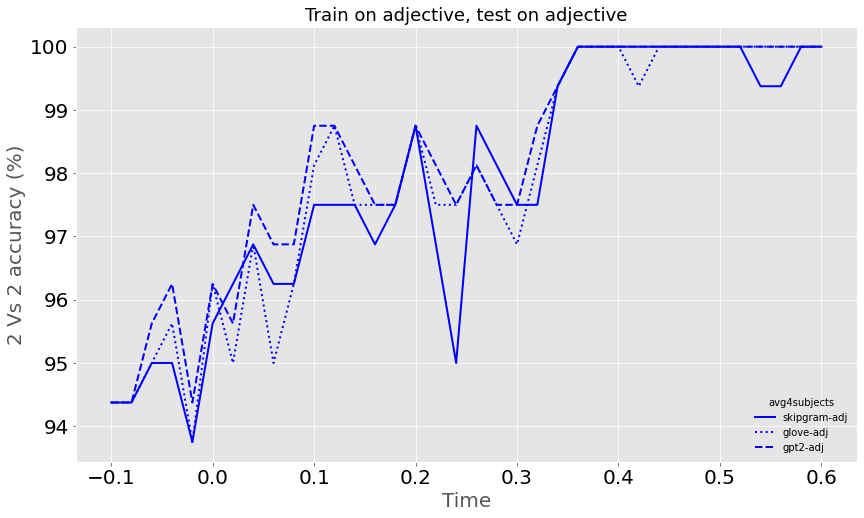

In [ ]:
plot_results_adj_adj(condition_result_dic_modified, 'avg4subjects', ['skipgram', 'glove', 'gpt2'], ['adj_adj'], 'adj')


In [ ]:
condition_result_dic_modified['a0003'].keys()

dict_keys(['skipgram', 'gpt2', 'glove', 'skipgram, glove, gpt2'])